# 데이터 준비


pandas 가져오기- 표 테이터 다룰 때 가장 많이쓰는 바로 그 라이브러리  -*판다스*

In [119]:
import pandas as pd
print("가 즈 아!!~~")

가 즈 아!!~~


**(1)데이터 가져오기**

In [120]:
from sklearn.datasets import load_diabetes 
diabetes = load_diabetes()

In [121]:
diabetes.keys()  # 데이터 확인하기

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [122]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [123]:
df_X = diabetes.data
df_y = diabetes.target

print(df_X.shape)
print(df_y.shape)

(442, 10)
(442,)


**모델에 예측할 데이터 X와 y 준비하기**

In [124]:
import numpy as np
X = np.array(df_X)  # df_X에 있는 값들을 numpy array로 변환해서 저장
y = np.array(df_y)  # df_y에 있는 값들을 numpy array로 변환해서 저장

print(X)
print(y)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 

**train 데이터와 test 데이터로 분리하기**

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("가자고~~!!")

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

가자고~~!!
(353, 10) (353,)
(89, 10) (89,)


**모델 준비하기**

In [126]:
w = np.random.rand(10)
b = np.random.rand()

print(w)
print(b)

[0.25398116 0.05113852 0.36451897 0.03161889 0.58218954 0.87337814
 0.76365114 0.68766609 0.41828858 0.33947373]
0.12135071596827307


In [127]:
def model(X, w, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i]
    predictions += b
    return predictions
print("나 그냥 갈까?")


나 그냥 갈까?


**손실함수 loss정의하기**

In [128]:
def MSE(a, b):
    mse = ((a-b) ** 2).mean() # 두 값의 차이의 제곱의 평균
    return mse
print("왔으요?")

왔으요?


In [129]:
def loss(X, w, b, y):
    predictions = model(X, w, b)
    L = MSE(predictions, y)
    return L
    print("갈끄나?")

**기울기를 구하는 gradient 함수 구현하기**

In [130]:
def gradient(X, w, b, y):
    #N은 가중치의 개수
    N = len(w)

    # y_pred 준비
    y_pred = model(X,w, b)

    # 공식에 맞게 gradient 계산
    dw = 1/N * 2 * X.T.dot(y_pred - y)

    db = 2 * (y_pred - y).mean()
    return dw, db 
print("잔다~")

잔다~


In [131]:
dw, db = gradient(X, w, b, y)
print("dw:", dw)
print("db:", db)

dw: [ -60.26167087  -13.54469074 -189.27476348 -142.29579226  -67.827052
  -55.60140134  127.51794675 -138.63540264 -182.47211734 -123.14186894]
db: -304.0242668938553


**하이퍼 파라미터인 학습률 설정하기**

In [132]:
LEARNING_RATE =0.01

In [133]:
losses = []

for i in range(1, 1501):
    dw, db = gradient(X_train, w, b, y_train)
    w -= LEARNING_RATE * dw
    b -= LEARNING_RATE * db
    L = loss(X_train, w, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))


Iteration 10 : Loss 21809.9500
Iteration 20 : Loss 16573.8447
Iteration 30 : Loss 13078.1790
Iteration 40 : Loss 10744.4448
Iteration 50 : Loss 9186.4252
Iteration 60 : Loss 8146.2789
Iteration 70 : Loss 7451.8689
Iteration 80 : Loss 6988.2753
Iteration 90 : Loss 6678.7765
Iteration 100 : Loss 6472.1526
Iteration 110 : Loss 6334.2089
Iteration 120 : Loss 6242.1165
Iteration 130 : Loss 6180.6349
Iteration 140 : Loss 6139.5893
Iteration 150 : Loss 6112.1870
Iteration 160 : Loss 6093.8929
Iteration 170 : Loss 6081.6797
Iteration 180 : Loss 6073.5260
Iteration 190 : Loss 6068.0826
Iteration 200 : Loss 6064.4485
Iteration 210 : Loss 6062.0224
Iteration 220 : Loss 6060.4026
Iteration 230 : Loss 6059.3213
Iteration 240 : Loss 6058.5994
Iteration 250 : Loss 6058.1174
Iteration 260 : Loss 6057.7957
Iteration 270 : Loss 6057.5809
Iteration 280 : Loss 6057.4375
Iteration 290 : Loss 6057.3417
Iteration 300 : Loss 6057.2778
Iteration 310 : Loss 6057.2352
Iteration 320 : Loss 6057.2067
Iteration 330

모델 **학습하기**

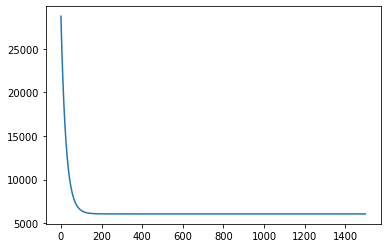

In [134]:
# 정의된 손실함수와 기울기 함수로 모델을 학습
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

**test 데이터에 대한 성능 확인**

In [135]:
w, b

(array([  752.0384918 ,    24.73758543,  2359.15652391,  1775.82099674,
          773.62932718,   595.86138473, -1490.35681712,  1668.55324417,
         2174.93700224,  1558.92008422]), 153.7308701399846)

In [136]:
prediction = model(X_test, w, b)
mse = loss(X_test, w, b, y_test)
mse

5342.464020810699

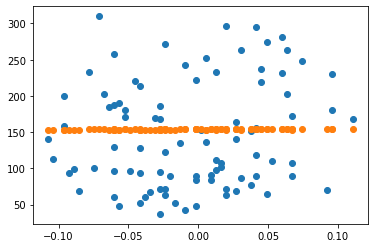

In [137]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

# 프로젝트 2. 날씨좋은 월요일 오후 세시,
자전거 타는 사람은 몇 명?

**데이터 가져오기**

In [138]:
train = pd.read_csv('/content/train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [139]:
test = pd.read_csv('/content/test.csv')

datetime column을 datetime 자료형으로 변환.
- 년, 월, 일, 시, 분, 초의 6개의 컬럼 생성**

In [140]:
# https://jimmy-ai.tistory.com/156 참조

In [141]:
train['datetime']

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

type이 object라는 것을 알 수 이다. datetime은 시간 형식이기 때문에, 숫자형으로 바꿔야 한다.

In [142]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [143]:
train['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

**굵은 텍스트**

In [144]:
train['datetime'].dt.year # dt.year이 하나의 명령어이다.

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: datetime, Length: 10886, dtype: int64

In [145]:
train['datetime'].dt.month 

0         1
1         1
2         1
3         1
4         1
         ..
10881    12
10882    12
10883    12
10884    12
10885    12
Name: datetime, Length: 10886, dtype: int64

In [146]:
train['datetime'].dt.day

0         1
1         1
2         1
3         1
4         1
         ..
10881    19
10882    19
10883    19
10884    19
10885    19
Name: datetime, Length: 10886, dtype: int64

In [147]:
train['datetime'].dt.day

0         1
1         1
2         1
3         1
4         1
         ..
10881    19
10882    19
10883    19
10884    19
10885    19
Name: datetime, Length: 10886, dtype: int64

In [148]:
train['datetime'].dt.hour 

0         0
1         1
2         2
3         3
4         4
         ..
10881    19
10882    20
10883    21
10884    22
10885    23
Name: datetime, Length: 10886, dtype: int64

In [149]:
train['datetime'].dt.minute

0        0
1        0
2        0
3        0
4        0
        ..
10881    0
10882    0
10883    0
10884    0
10885    0
Name: datetime, Length: 10886, dtype: int64

In [150]:
train['datetime'].dt.second

0        0
1        0
2        0
3        0
4        0
        ..
10881    0
10882    0
10883    0
10884    0
10885    0
Name: datetime, Length: 10886, dtype: int64

In [151]:
# column 생성

train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

In [152]:
train.head() # 생성 이상 확인

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


*year, month, day, hour, minute, second 데이터 갯수 시각화**

In [153]:
import seaborn as sns 
import matplotlib.pyplot

In [154]:
# countplot 명령을 사용하면 각 카테고리 값별로 데이터가 얼마나 있는지 표시할 수 있다.
# countplot(x="columnn_name", data=dataframe)

#matplotlib.pyplot 모듈의 subplot()함수는 여러 개의 그래프를 하나의 그림에 나타내도록
#plt.subplot(row, column, index)

#참조 https://www.tutorialspoint.com/how-do-i-plot-two-countplot-graphs-side-by-side-in-seaborn-using-matplotlib


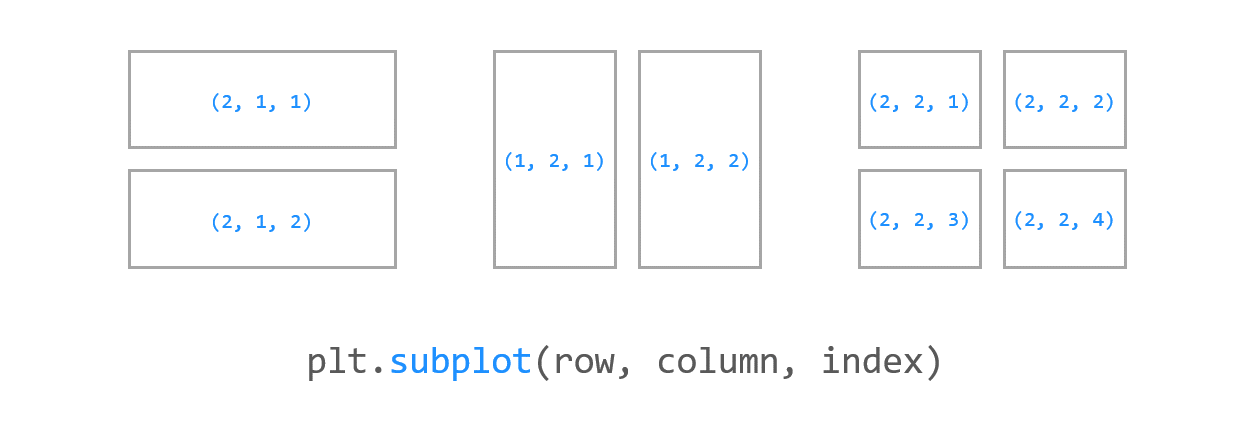

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


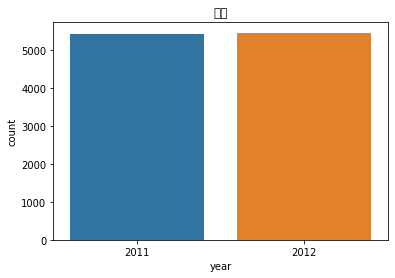

In [155]:
# subplot 안 쓰고 하나씩 만들어보기

sns.countplot(x= "year", data = train)
plt.title('연도')
plt. show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)


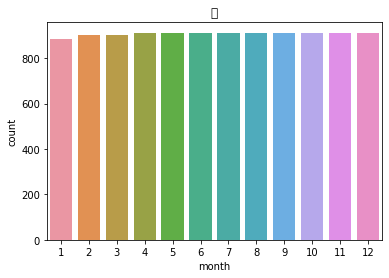

In [156]:
sns.countplot(x= "month", data = train)
plt.title('월')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)


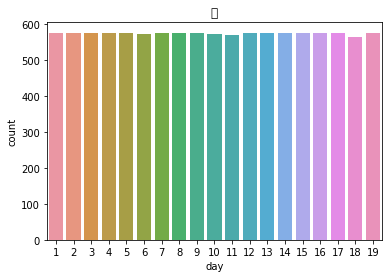

In [157]:
sns.countplot(x= "day", data = train)
plt.title('일')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)


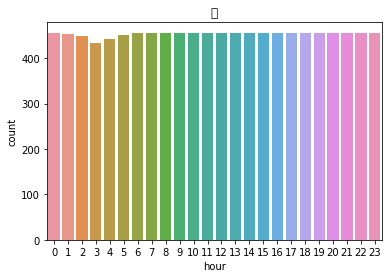

In [158]:
sns.countplot(x= "hour", data = train)
plt.title('시')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0, flags=flags)


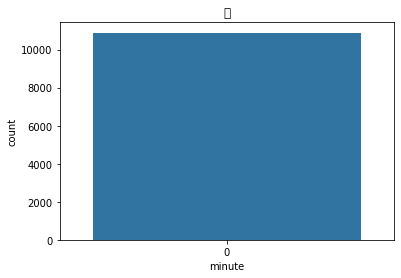

In [159]:
sns.countplot(x= "minute", data = train)
plt.title('분')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52488 missing from current font.
  font.set_text(s, 0, flags=flags)


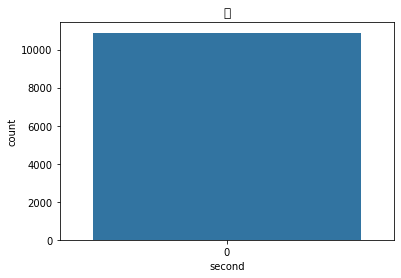

In [160]:
sns.countplot(x= "second", data = train)
plt.title('초')
plt.show()

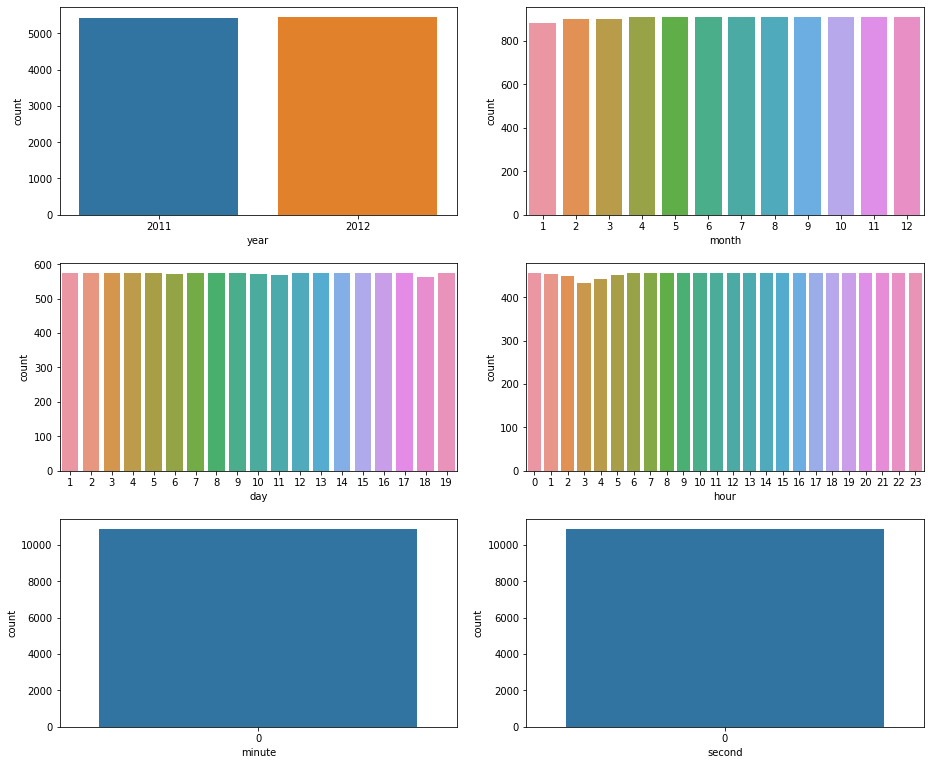

In [161]:
fig, ax = plt.subplots(3,2, figsize = (12, 10))
sns.countplot(data = train, x = "year", ax = ax[0,0])
sns.countplot(data = train, x = "month", ax = ax[0,1])
sns.countplot(data = train, x = "day", ax = ax[1,0])
sns.countplot(data = train, x = "hour", ax = ax[1,1])
sns.countplot(data = train, x = "minute", ax = ax[2,0])
sns.countplot(data = train, x = "second", ax = ax[2,1])

fig.tight_layout()
plt.subplots_adjust(left=4, bottom=4, right=5, top=5)

# subplots_adjust(left, bottom, right, top, wspace, hspace)
# 그래프들 간격 사이 조정

** X, y 컬럼 선택 및 train/test 데이터 분리**

In [162]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


자전거 타기에 날씨가 영향을 많이 끼치는 것으로 나타난다. 계절, 날씨, 풍속, 월, 시간 등이 양의 상관관게로 나타난다. 휴일도 중요한 요인이다.****

# X, y 컬럼 선택 및 train/test 데이터 분리

In [166]:
train = train[['datetime',	'season',	'holiday',	'workingday',	'weather',	'temp',	'atemp',	'humidity',	'windspeed',	'casual',	'

SyntaxError: ignored

In [168]:
X = train[['season', 'weather', 'windspeed', 'month', 'hour', 'workingday','holiday', 'temp', 'humidity']].values
y = train['count'].values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


IndexError: ignored

In [169]:
X.shape, y.shape

((442, 10), (442,))

In [170]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_train.shape, y_test.shape)

(353, 10) (353,)
(353, 10) (89,)


# linearRegression 모델 학습

In [171]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [172]:
model.fit(X_train, y_train)

LinearRegression()

# 학습된 모델로 X_test어ㅔ 대한 예측값 출력 및 손실 함수값 계산

In [173]:
predictions = model.predict(X_test)
predictions

array([139.5483133 , 179.52030578, 134.04133298, 291.41193598,
       123.78723656,  92.17357677, 258.23409704, 181.33895238,
        90.22217862, 108.63143298,  94.13938654, 168.43379636,
        53.50669663, 206.63040068, 100.13238561, 130.66881649,
       219.53270758, 250.78291772, 196.36682356, 218.57497401,
       207.35002447,  88.48361667,  70.43428801, 188.95725301,
       154.88720039, 159.35957695, 188.31587948, 180.38835506,
        47.98988446, 108.97514644, 174.78080029,  86.36598906,
       132.95890535, 184.5410226 , 173.83298051, 190.35863287,
       124.41740796, 119.65426903, 147.95402494,  59.05311211,
        71.62636914, 107.68722902, 165.45544477, 155.00784964,
       171.04558668,  61.45763075,  71.66975626, 114.96330486,
        51.57808027, 167.57781958, 152.52505798,  62.95827693,
       103.49862017, 109.20495627, 175.63844013, 154.60247734,
        94.41476124, 210.74244148, 120.25601864,  77.61590087,
       187.93503183, 206.49543321, 140.63018684, 105.59

In [174]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

2900.1732878832318

In [175]:
RMSE = mse ** 0.5
RMSE

53.8532569849144

## X축은 temp 또는 humidity 로, y축은 count로 예측결과 시각화하기

In [176]:
# 참고 https://jimmy-ai.tistory.com/37

In [179]:
plt.figure(figsize=(10,6))

plt.scatter(train['temp'], # x축
            train['count'], # y축
            c = 'green', # 색깔(고정)
            alpha = 0.5) # 투명도

plt.xlabel('temp', size = 12)
plt.ylabel('count', size = 12)
plt.title('bike sharing bubble chart', size = 15)
plt.show()

IndexError: ignored

<Figure size 720x432 with 0 Axes>

### 회고

당뇨

노드를 겨우겨우 따라가고 있지만, 이해되거나 소화되는 것이 없다.
하지만, '당뇨' 프로젝트를 통해 팀원들과 대화하며 아무 의미도 모른채 여러번 반복해서 타이핑하고 수정하던 오타가 조금씩 의미있는 것임을 알게 되며 기쁨을 맛본다.

모두들 무언가 해결되지 않는다며 고심하고 있을 때, 나는 밀린 여러가지를 하느라 대화에 끼여들을 짬도 없었으나, 모두들 한 발 한 발 배워나가고 있는 것이 느껴졌다.

두려움을 떨쳐내고 한 번이라도 더 해 보기로 한다. 

자전거

당뇨는 명찬님이 힘들더라도 직접 해 보라고 여러번 권한 덕에 이해가 되는 듯 하며 매우 기뻤는데 반해, 이 자전거 프로젝트는 처음부터 필사 라도 하려 했다.
필사를 끝낸 마지막 순간에 "저장" 하지 못했으나. .. . .

마감시간을 지난 이 시간에도 이 밤의 끝을 잡고 있을 만 하다는 생각이 든다.

필사를 했음에도 마지막 오류는 뭐란 말인가.

매우 급한 마음으로 친절하게 도와주는 여러 '님'들이 고맙다.
철영 '님'은 무슨 도움을 누구에게 줄 수 있을꼬~~
